In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from IPython.core.display import HTML
import datetime
import numpy as np
import numpy.ma as ma
import pickle

In [2]:
#year = 18; w = 470
year = 19; w = 543
#2019
r1 = datetime.datetime(2019, 7, 31)
r2 = datetime.datetime(2019, 8, 3)
r3 = datetime.datetime(2019, 8, 4)
r4 = datetime.datetime(2019, 8, 5)

In [3]:
save = os.getcwd()
save = os.path.join(save,"save")
save = os.path.join(save,str(year))
save = os.path.join(save,'df.pickle')

with open(save, 'rb') as f:
    df = pickle.load(f)

Index(['Name', 'club', 'position', 'Played', 'Goals', 'Assists',
       'Clean Sheets', 'Conceded', 'Points', 'Points Last Season',
       'Division 1 Price', 'Division 2 Price', 'Division 3A Price',
       'Division 3B Price', 'Division 3C Price', 'Division 4A Price',
       'Division 4B Price', 'Division 4C Price', 'Division 4D Price',
       'Division 5A Price', 'Division 5B Price', 'Division 5C Price',
       'Division 5D Price', 'Division 5E Price', 'Division 5F Price',
       'Division 6A Price', 'Division 6B Price', 'Division 6C Price',
       'Division 6D Price', 'Division 6E Price', 'Division 6F Price',
       'Division 6G Price', 'Division 6H Price', 'Division 6I Price',
       'Division 7A Price', 'Division 7B Price', 'Division 7C Price',
       'Division 7D Price', 'Division 7E Price', 'Division 7F Price',
       'Division 7G Price', 'Division 7H Price', 'Division 7I Price',
       'Division 7J Price', 'Division 7K Price', 'Division 7L Price',
       'Division 7M Price', 'D

In [5]:
display(HTML(df.sort_values(by=['Points Last Season'],ascending=False).to_html()))

,Name,club,position,Played,Goals,Assists,Clean Sheets,Conceded,Points,Points Last Season,Division 1 Price,Division 2 Price,Division 3A Price,Division 3B Price,Division 3C Price,Division 4A Price,Division 4B Price,Division 4C Price,Division 4D Price,Division 5A Price,Division 5B Price,Division 5C Price,Division 5D Price,Division 5E Price,Division 5F Price,Division 6A Price,Division 6B Price,Division 6C Price,Division 6D Price,Division 6E Price,Division 6F Price,Division 6G Price,Division 6H Price,Division 6I Price,Division 7A Price,Division 7B Price,Division 7C Price,Division 7D Price,Division 7E Price,Division 7F Price,Division 7G Price,Division 7H Price,Division 7I Price,Division 7J Price,Division 7K Price,Division 7L Price,Division 7M Price,Division 1 When,Division 2 When,Division 3A When,Division 3B When,Division 3C When,Division 4A When,Division 4B When,Division 4C When,Division 4D When,Division 5A When,Division 5B When,Division 5C When,Division 5D When,Division 5E When,Division 5F When,Division 6A When,Division 6B When,Division 6C When,Division 6D When,Division 6E When,Division 6F When,Division 6G When,Division 6H When,Division 6I When,Division 7A When,Division 7B When,Division 7C When,Division 7D When,Division 7E When,Division 7F When,Division 7G When,Division 7H When,Division 7I When,Division 7J When,Division 7K When,Division 7L When,Division 7M When
516,Mohamed Salah,Liverpool,Forward,33.0,19.0,10.0,NaN,NaN,110.0,127.0,34.0,40.0,14.5,31.0,28.0,15.5,41.0,20.5,28.0,31.5,28.0,16.0,0.0,55.0,1.0,25.0,20.0,30.0,35.0,0.0,25.5,0.0,21.0,0.0,14.0,0.5,0.0,18.5,0.0,14.0,9.0,0.0,0.0,0.0,0.0,21.0,21.0,2019-07-31,2019-07-31,2019-07-31,2019-07-31,2019-07-31,2019-07-31,2019-07-31,2019-07-31,2019-07-31,2019-07-31,2019-07-31,2019-07-31,2019-07-31,2019-08-03,2019-07-31,2019-07-31,2019-07-31,2019-07-31,2019-07-31,2019-07-31,2019-07-31,2019-07-31,2019-07-31,2019-07-31,2019-07-31,2019-07-31,2019-07-31,2019-07-31,2019-07-31,2019-07-31,2019-07-31,2019-07-31,2019-07-31,2019-07-31,2019-07-31,2019-07-31,2019-07-31
118,Andrew Robertson,Liverpool,Defender,34.0,2.0,12.0,13.0,32.0,92.0,118.0,18.0,20.0,18.0,21.0,13.5,16.5,11.0,18.5,12.0,19.0,18.0,18.5,15.0,18.0,6.5,16.0,18.0,15.5,18.5,13.0,20.0,16.5,20.0,15.5,18.0,15.0,15.5,12.5,17.5,18.5,18.5,21.0,21.0,15.0,20.5,12.5,14.5,2019-07-31,2019-07-31,2019-07-31,2019-07-31,2019-07-31,2019-07-31,2019-07-31,2019-07-31,2019-07-31,2019-07-31,2019-07-31,2019-07-31,2019-07-31,2019-07-31,2019-07-31,2019-07-31,2019-07-31,2019-07-31,2019-07-31,2019-07-31,2019-07-31,2019-07-31,2019-07-31,2019-07-31,2019-07-31,2019-07-31,2019-07-31,2019-07-31,2019-07-31,2019-07-31,2019-07-31,2019-07-31,2019-07-31,2019-07-31,2019-07-31,2019-07-31,2019-07-31
112,Virgil van Dijk,Liverpool,Defender,38.0,5.0,1.0,15.0,33.0,90.0,112.0,15.0,11.0,18.0,0.5,14.5,16.5,27.0,20.0,18.0,16.5,10.5,16.5,22.0,21.0,18.0,21.5,21.5,22.0,19.5,20.0,15.0,10.5,18.5,20.0,21.0,22.0,21.5,21.5,21.5,21.0,20.0,18.5,20.5,18.5,18.5,12.5,20.5,2019-07-31,2019-07-31,2019-07-31,2019-07-31,2019-07-31,2019-07-31,2019-08-03,2019-08-03,2019-07-31,2019-07-31,2019-07-31,2019-07-31,2019-07-31,2019-07-31,2019-07-31,2019-07-31,2019-07-31,2019-07-31,2019-07-31,2019-07-31,2019-07-31,2019-07-31,2019-07-31,2019-07-31,2019-07-31,2019-07-31,2019-07-31,2019-07-31,2019-07-31,2019-07-31,2019-07-31,2019-07-31,2019-07-31,2019-07-31,2019-07-31,2019-07-31,2019-07-31
462,Sergio Aguero,Manchester City,Forward,18.0,16.0,5.0,NaN,NaN,76.0,112.0,NaN,22.5,NaN,31.0,NaN,NaN,NaN,25.0,24.5,NaN,NaN,18.0,17.0,12.0,NaN,0.0,1.0,0.0,20.0,0.0,31.0,NaN,NaN,19.5,0.0,0.0,21.0,17.0,34.0,16.0,0.0,3.5,0.0,0.0,NaN,27.0,30.0,NaT,2019-07-31,NaT,2019-07-31,NaT,NaT,NaT,2019-07-31,2019-07-31,NaT,NaT,2019-07-31,2019-08-03,2019-07-31,NaT,2019-08-03,2019-07-31,2019-07-31,2019-07-31,2019-08-03,2019-07-31,NaT,NaT,2019-07-31,2019-07-31,2019-07-31,2019-08-03,2019-07-31,2019-08-03,2019-07-31,2019-08-03,2019-08-03,2019-08-03,2019-07-31,NaT,2019-07-31,2019-07-31
244,Eden Hazard,Chelsea,Midfielder,0.0,0.0,0.0,NaN,NaN,0.0,110.0,NaN,Na

  ## Add useful extra columns

In [8]:
df2 = df.filter(regex='Price').fillna(0)
df['Average Cost'] = df2.mean(axis = 1,skipna=True)

In [9]:
df['Max Cost'] = df2.max(axis = 1,skipna=True)
df['Cost Deviation'] = df2.std(axis = 1,skipna=True)

In [10]:
df['Zero Bids'] = df2.apply( lambda s : s.value_counts().get(0,0), axis=1)

In [11]:
aves = df.mean(axis = 0, skipna = True)

In [12]:
mcpp = aves['Max Cost']/aves['Points']

In [13]:
df['Rough Guide'] = mcpp*df['Points']
df['Underrated'] = df['Rough Guide'] - df['Max Cost']

## Price Points

In [14]:
df3 = df.filter(regex='When')
r1bool = df3 == pd.Timestamp(r1)
r1s = np.nan_to_num(r1bool.values*df2.values)
r1cols = ( 'Division 1 Price', 'Division 2 Price', 'Division 3A Price',
       'Division 3B Price', 'Division 3C Price', 'Division 4A Price',
       'Division 4B Price', 'Division 4C Price', 'Division 4D Price',
       'Division 5A Price', 'Division 5B Price', 'Division 5C Price',
       'Division 5D Price', 'Division 5E Price', 'Division 5F Price',
       'Division 6A Price', 'Division 6B Price', 'Division 6C Price',
       'Division 6D Price', 'Division 6E Price', 'Division 6F Price',
       'Division 6G Price', 'Division 6H Price', 'Division 6I Price',
       'Division 7A Price', 'Division 7B Price', 'Division 7C Price',
       'Division 7D Price', 'Division 7E Price', 'Division 7F Price',
       'Division 7G Price', 'Division 7H Price', 'Division 7I Price',
       'Division 7J Price', 'Division 7K Price', 'Division 7L Price',
       'Division 7M Price')
dfr1 = pd.DataFrame(r1s,columns=r1cols)
dfn = df[['Name','Points Last Season','Points']]

In [17]:
a = dfn[dfn['Name'].str.contains('Alisson')]
print(a.iloc[0,0])
b = dfr1['Division 4D Price']
c = dfr1['Division 1 Price']
print("Last Season scored: " + str(a.iloc[0,1]))
print("Earned this season: " + str(a.iloc[0,2]))
print("Division 4D Price = " + str(b[a.index[0]]))
print("Division 1 Price = " + str(c[a.index[0]]))
cols_1 = [col for col in dfr1.columns if '1' in col]
d1 = dfr1[cols_1].iloc[a.index[0]].tolist()
print("Tier 1")
print(d1)
cols_1 = [col for col in dfr1.columns if '2' in col]
d1 = dfr1[cols_1].iloc[a.index[0]].tolist()
print("Tier 2")
print(d1)
cols_1 = [col for col in dfr1.columns if '3' in col]
d1 = dfr1[cols_1].iloc[a.index[0]].tolist()
print("Tier 3")
print(d1)
cols_1 = [col for col in dfr1.columns if '4' in col]
d1 = dfr1[cols_1].iloc[a.index[0]].tolist()
print("Tier 4")
print(d1)
print("All:")
print(np.sort(r1s[a.index[0]]))

Alisson
Last Season scored: 96.0
Earned this season: 63.0
Division 4D Price = 16.0
Division 1 Price = 0.0
Tier 1
[0.0]
Tier 2
[0.0]
Tier 3
[1.0, 11.5, 12.5]
Tier 4
[7.5, 21.0, 10.0, 16.0]
All:
[ 0.   0.   0.   1.   1.5  7.5  7.5  9.   9.  10.  10.  10.  11.  11.5
 11.5 12.5 12.5 13.  13.5 14.  14.  14.  14.  15.  15.5 15.5 16.  16.
 16.  16.5 16.5 16.5 17.  17.  17.  17.  21. ]


## Underrated

In [14]:
dfa = df.sort_values(by=['Underrated'],ascending=False)
dfa = dfa[['Name','Underrated','Points','position']]
dfa = dfa[dfa['Points'] > 10]
dfa = dfa[dfa['Underrated'] > 2]
display(HTML(dfa.to_html()))

,Name,Underrated,Points,position
211,Enda Stevens,20.718384,77.0,Defender
212,John Egan,19.716369,74.0,Defender
301,Kevin de Bruyne,17.242563,113.0,Midfielder
473,Danny Ings,16.068508,102.0,Forward
221,George Baldock,15.718384,77.0,Defender
422,Jack Grealish,15.548359,72.0,Midfielder
176,Matthew Doherty,15.222414,83.0,Defender
82,Jonny Evans,15.046344,69.0,Defender
48,Dean Henderson,14.710324,65.0,Goalkeeper
535,Teemu Pukki,14.548359,72.0,Forward


In [15]:
#dfa.to_csv(r"C:\Users\Ollie\Downloads\output.csv")

## Histogram of bid values

In [18]:
allbids = np.nan_to_num(df2.values)

In [19]:
x = 0.01
nums,bins = np.histogram(allbids,np.arange(0-x,25.5-x,0.5))
vals = np.arange(0,25,0.5)

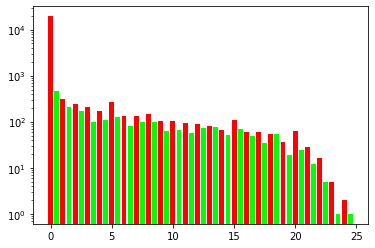

In [20]:
import matplotlib.cm as cm
c = cm.brg((vals%1)+0.5)
plt.bar(vals,nums,width=0.4,color=c)
plt.yscale('log')

## Who got the most zero bids?

In [20]:
#(HTML(df.sort_values(by=['Zero Bids'],ascending=False).to_html()))

In [21]:
df.sort_values(by=['Zero Bids'],ascending=False)

,Name,club,Position,Played,Goals,Assists,Clean Sheets,Conceded,Points,Points Last Season,...,Division 7I When,Division 7J When,Division 7K When,Division 7L When,Average Cost,Max Cost,Cost Deviation,Zero Bids,Rough Guide,Underrated
546,H Elliott,Fulham,Midfielder,0.0,0.0,0.0,NaN,NaN,0.0,NaN,...,NaT,NaT,NaT,NaT,0.000000,0.0,0.000000,35,0.000000,0.000000
178,Ragnar Klavan,Liverpool,Defender,0.0,0.0,0.0,0.0,0.0,0.0,36.0,...,NaT,NaT,NaT,NaT,0.000000,0.0,0.000000,35,0.000000,0.000000
476,Diego Rico,Bournemouth,Defender,8.0,0.0,0.0,0.0,19.0,-3.0,NaN,...,NaT,NaT,NaT,NaT,0.000000,0.0,0.000000,35,-0.857653,-0.857653
184,Eliaquim Mangala,Manchester City,Defender,0.0,0.0,0.0,0.0,0.0,0.0,11.0,...,NaT,NaT,NaT,NaT,0.000000,0.0,0.000000,35,0.000000,0.000000
473,Fabri,Fulham,Goalkeeper,2.0,0.0,0.0,0.0,5.0,-1.0,NaN,...,NaT,NaT,NaT,NaT,0.000000,0.0,0.000000,35,-0.285884,-0.285884
471,Robert Green,Chelsea,Goalkeeper,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,NaT,NaT,NaT,NaT,0.000000,0.0,0.000000,35,0.000000,0.000000
470,Anders Lindegaard,Burnley,Goalkeeper,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,NaT,NaT,NaT,NaT,0.000000,0.0,0.000000,35,0.000000,0.000000
468,B Enobakhare,Wolverhampton Wanderers,Forward,0.0,0.0,0.0,NaN,NaN,0.0,NaN,...,NaT,NaT,NaT,NaT,0.000000,0.0,0.000000,35,0.000000,0.000000
465,Andy Carroll,West Ham United,Forward,5.0,0.0,0.0,NaN,NaN,5.0,19.0,...,NaT,NaT,NaT,NaT,0.000000,0.0,0.000000,35,1.429422,1.429422
192,C Clark,Newcastle United,Defender,10.0,3.0,0.0,2.0,15.0,18.0,24.0,...,NaT,NaT,NaT,NaT,0.000000,0.0,0.000000,35,5.145919,5.145919


In [22]:
dfa = df.sort_values(by=['Zero Bids'],ascending=False)
dfa = dfa[['Name','Zero Bids','Points']]
dfa = dfa[dfa['Points'] > 10]
dfa = dfa[dfa['Zero Bids'] > 10]
#display(HTML(dfa.to_html()))

## Previous Points vs Average Price

In [23]:
dfs = df[['Average Cost','Points Last Season']].dropna()

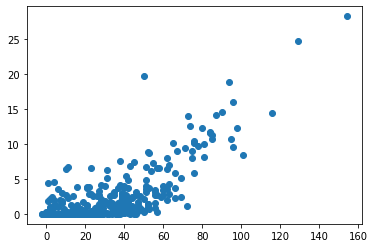

In [24]:
plt.scatter(dfs['Points Last Season'],dfs['Average Cost'])

## Points vs Average Price

In [25]:
dfs = df[['Average Cost','Points']].dropna()

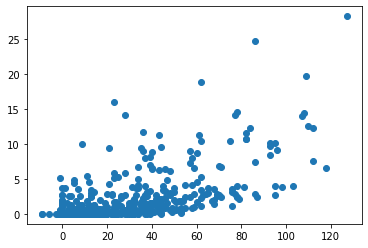

In [26]:
plt.scatter(dfs['Points'],dfs['Average Cost'])

In [27]:
slope, intercept, r_value, p_value, std_err = stats.linregress(dfs['Points'],dfs['Average Cost'])
print("slope", slope)
print("intercept", intercept)
print("r-squared:", r_value**2)

slope 0.0831261307786367
intercept -0.29306648195272467
r-squared: 0.40346603696619143


## Points vs Max Price

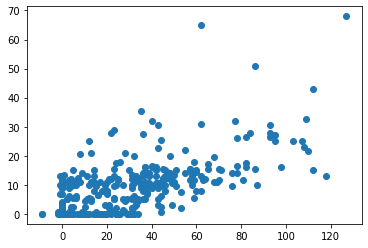

In [28]:
dfs = df[['Name','Max Cost','Points','Position','Points Last Season']].dropna()
plt.scatter(dfs['Points'],dfs['Max Cost'])

## Previous Points vs Average Price

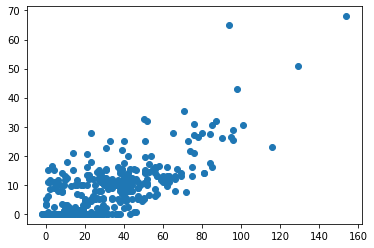

In [29]:
plt.scatter(dfs['Points Last Season'],dfs['Max Cost'])

In [30]:
slope, intercept, r_value, p_value, std_err = stats.linregress(dfs['Points'],dfs['Max Cost'])
print("slope", slope)
print("intercept", intercept)
print("r-squared:", r_value**2)

slope 0.2241768609031253
intercept 2.481902986019569
r-squared: 0.4290828381358122


## Price per round

In [31]:
df2 = df.filter(regex='Price')
df3 = df.filter(regex='When')

In [32]:
df4 = df3 == pd.Timestamp(datetime.datetime(2018, 8, 2))

In [33]:
firstrounds = np.nan_to_num(df4.values*df2.values)

In [34]:
r1only = ma.array(df2.values, mask = ~df4.values)

In [35]:
df4.values

array([[False, False, False, ..., False, False, False],
       [ True,  True, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [36]:
df['Round 1 Activty'] = np.any(df4.values,axis=1)

In [37]:
df['Round 1 Average'] = ma.mean(r1only,axis=1)

In [38]:
maxfirstbids = np.max(firstrounds, axis=1)

In [39]:
df['Highest R1 Bid'] = maxfirstbids

In [40]:
r2bool = df3 == pd.Timestamp(datetime.datetime(2018, 8, 5))
r2s = np.nan_to_num(r2bool.values*df2.values)
r2only = ma.array(df2.values, mask = ~r2bool.values)
df['Round 2 Average'] = ma.mean(r2only,axis=1)
maxr2 = np.max(r2s,axis=1)
df['Highest R2 Bid'] = maxr2
df['Round 2 Activty'] = np.any(r2bool.values,axis=1)

In [41]:
df12 = df[df['Round 1 Activty']]
df12 = df12[df12['Round 2 Activty']]

In [42]:
slope, intercept, r_value, p_value, std_err = stats.linregress(df12['Round 1 Average'],df12['Round 2 Average'])
print("slope", slope)
print("intercept", intercept)
print("r-squared:", r_value**2)
x = np.linspace(0,25,2)
y2 = slope*x + intercept

slope 1.2290206613191228
intercept 1.3008334962725736
r-squared: 0.6961853933002355


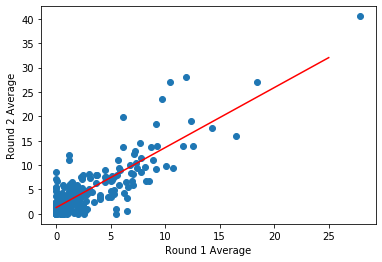

In [43]:
plt.scatter(df12['Round 1 Average'],df12['Round 2 Average'])
plt.xlabel('Round 1 Average')
plt.ylabel('Round 2 Average')
plt.plot(x,y2,color = 'r')

Text(0, 0.5, 'Highest R2 Bid')

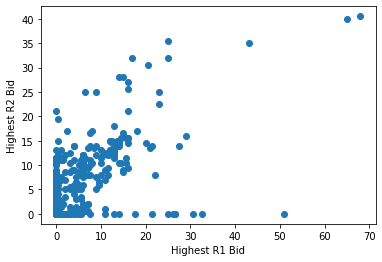

In [44]:
plt.scatter(df['Highest R1 Bid'],df['Highest R2 Bid'])
plt.xlabel('Highest R1 Bid')
plt.ylabel('Highest R2 Bid')

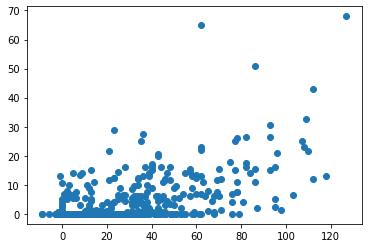

In [45]:
dfs = df[['Name','Highest R1 Bid','Points','Position']].dropna()
plt.scatter(dfs['Points'],dfs['Highest R1 Bid'])

## First transfer window bargains

In [6]:
dft = df.iloc[w:]
dft_p = dft.filter(regex='Price')
dft_w = dft.filter(regex='When')

In [10]:
dft_true = dft_w == pd.Timestamp(datetime.datetime(2019, 9, 9))
first_transfers = np.nan_to_num(dft_true.values*dft_p.values)
maxfirstbids = np.max(first_transfers, axis=1)
dft['Highest T1 Bid'] = maxfirstbids

C:\PhD\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [11]:
dft['eff'] = (dft['Points']**2)/(dft['Highest T1 Bid']+0.5)

C:\PhD\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [13]:
display(HTML(dft.sort_values(by=['Highest T1 Bid'],ascending=False).to_html()))

,Name,club,position,Played,Goals,Assists,Clean Sheets,Conceded,Points,Points Last Season,Division 1 Price,Division 2 Price,Division 3A Price,Division 3B Price,Division 3C Price,Division 4A Price,Division 4B Price,Division 4C Price,Division 4D Price,Division 5A Price,Division 5B Price,Division 5C Price,Division 5D Price,Division 5E Price,Division 5F Price,Division 6A Price,Division 6B Price,Division 6C Price,Division 6D Price,Division 6E Price,Division 6F Price,Division 6G Price,Division 6H Price,Division 6I Price,Division 7A Price,Division 7B Price,Division 7C Price,Division 7D Price,Division 7E Price,Division 7F Price,Division 7G Price,Division 7H Price,Division 7I Price,Division 7J Price,Division 7K Price,Division 7L Price,Division 7M Price,Division 1 When,Division 2 When,Division 3A When,Division 3B When,Division 3C When,Division 4A When,Division 4B When,Division 4C When,Division 4D When,Division 5A When,Division 5B When,Division 5C When,Division 5D When,Division 5E When,Division 5F When,Division 6A When,Division 6B When,Division 6C When,Division 6D When,Division 6E When,Division 6F When,Division 6G When,Division 6H When,Division 6I When,Division 7A When,Division 7B When,Division 7C When,Division 7D When,Division 7E When,Division 7F When,Division 7G When,Division 7H When,Division 7I When,Division 7J When,Division 7K When,Division 7L When,Division 7M When,Highest T1 Bid,eff
570,Nicolas Pepe,Arsenal,Midfielder,22.0,5.0,5.0,NaN,NaN,47.0,NaN,25.0,25.0,25.0,21.0,22.0,25.0,16.0,25.0,25.0,25.0,25.0,10.0,16.0,25.0,NaN,NaN,11.0,0.0,20.0,25.0,25.0,25.0,20.0,22.0,12.0,NaN,NaN,25.0,NaN,25.0,5.0,8.0,NaN,14.0,1.5,11.5,20.0,2019-09-09,2019-09-09,2019-09-09,2019-09-09,2019-09-09,2019-09-09,2019-10-09,2019-09-09,2019-09-09,2019-10-09,2019-09-09,2019-09-09,2019-09-09,2019-09-09,NaT,NaT,2019-09-09,2020-03-09,2019-09-09,2019-09-09,2019-09-09,2019-09-09,2019-09-09,2019-09-09,2019-09-09,NaT,NaT,2019-09-09,NaT,2019-09-09,2020-02-09,2019-09-09,NaT,2019-09-09,2020-02-09,2019-09-09,2019-09-09,25.0,86.627451
585,Moise Kean,Everton,Forward,6.0,2.0,2.0,NaN,NaN,16.0,NaN,8.0,NaN,25.0,NaN,0.0,NaN,0.5,10.5,17.0,12.0,12.0,NaN,NaN,0.5,NaN,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,15.0,NaN,2019-09-09,NaT,2019-09-09,NaT,2020-02-09,NaT,2020-02-09,2019-09-09,2019-09-09,2019-09-09,2019-09-09,NaT,NaT,2019-10-09,NaT,NaT,2019-09-09,NaT,NaT,NaT,NaT,NaT,NaT,2019-10-09,NaT,NaT,NaT,NaT,NaT,NaT,2019-10-09,NaT,NaT,NaT,NaT,2019-09-09,NaT,25.0,10.039216
565,Dani Ceballos,Arsenal,Midfielder,18.0,0.0,2.0,NaN,NaN,22.0,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,25.0,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.5,NaN,NaT,NaT,NaT,2019-09-09,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2019-09-09,NaT,2019-09-09,NaT,NaT,NaT,2019-10-09,NaT,NaT,NaT,NaT,2019-09-09,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2019-09-09,NaT,25.0,18.980392
586,Neal Maupay,Brighton & Hove Albion,Forward,30.0,10.0,3.0,NaN,NaN,66.0,NaN,5.5,13.5,NaN,1.5,1.5,10.0,6.0,25.0,7.0,7.5,5.0,0.0,1.0,0.0,0.0,0.5,NaN,NaN,0.0,NaN,NaN,0.0,2.0,NaN,NaN,NaN,NaN,0.0,NaN,1.0,2.0,NaN,NaN,NaN,0.0,1.5,0.5,2019-09-09,2019-10-09,NaT,2019-09-09,2019-09-09,2019-09-09,2019-09-09,2019-09-09,2019-10-09,2019-09-09,2019-10-09,2020-01-09,2019-09-09,2019-11-09,2019-10-09,2019-09-09,NaT,NaT,2019-11-09,NaT,NaT,2019-07-15,2019-10-09,NaT,NaT,NaT,NaT,2019-10-09,NaT,2020-02-09,2019-09-09,NaT,NaT,NaT,2020-01-09,2019-09-09,2019-09-09,25.0,170.823529
582,Joelinton,Newcastle United,Forward,32.0,2.0,2.0,NaN,NaN,42.0,NaN,5.0,10.0,25.0,11.0,5.0,13.0,1.0,7.5,9.0,10.0,0.0,NaN,1.0,0.0,0.0,0.0,9.0,NaN,NaN,NaN,2.0,0.0,3.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.5,1.5,2020-01-09,2019-09-09,2019-09-09,2019-09-09,2019-09-09,2019-09-09,2019-09-09,2019-09-09,2019-09-09,2019-09-09,2019-10-09,NaT,2019-09-09,2019-09-09,2020-03-09,2020-01-09,2019-09-09,NaT,NaT,NaT,2019-09-09,2019-07-15,2019-07-15,2019-12-09,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2019-09-09,2020-01-09,25.0,

## Jan transfer window

In [69]:
dfp = df.filter(regex='Price')
dfw = df.filter(regex='When')
r2bool = dfw == pd.Timestamp(datetime.datetime(2018, 1, 10))
r2s = np.nan_to_num(r2bool.values*df2.values)
r2only = ma.array(df2.values, mask = ~r2bool.values)
df['Feb Window Average'] = ma.mean(r2only,axis=1)
maxr2 = np.max(r2s,axis=1)
df['Highest Feb Bid'] = maxr2
df['Feb Window Activity'] = np.any(r2bool.values,axis=1)
df

,Name,club,Position,Played,Goals,Assists,Clean Sheets,Conceded,Points,Points Last Season,...,Underrated,Round 1 Activty,Round 1 Average,Highest R1 Bid,Round 2 Average,Highest R2 Bid,Round 2 Activty,Feb Window Average,Highest Feb Bid,Feb Window Activity
0,Petr Cech,Arsenal,Goalkeeper,6.0,0.0,0.0,1.0,9.0,5.0,42.0,...,-9.570578,True,5.000000,5.5,6.684211,11.0,True,0.0000,0.0,False
1,Bernd Leno,Arsenal,Goalkeeper,32.0,0.0,0.0,6.0,42.0,34.0,NaN,...,-0.779931,True,2.350000,10.0,5.352941,10.5,True,0.0000,0.0,False
2,David Ospina,Arsenal,Goalkeeper,0.0,0.0,0.0,0.0,0.0,0.0,9.0,...,-1.000000,False,0.000000,0.0,0.000000,0.0,False,0.0000,0.0,False
3,D Button,Brighton & Hove Albion,Goalkeeper,4.0,0.0,0.0,1.0,5.0,5.0,NaN,...,1.429422,False,0.000000,0.0,0.000000,0.0,True,0.0000,0.0,False
4,M Ryan,Brighton & Hove Albion,Goalkeeper,34.0,0.0,0.0,6.0,55.0,25.0,42.0,...,-4.852890,True,1.428571,5.0,2.333333,5.0,True,0.0000,0.0,False
5,J Steele,Brighton & Hove Albion,Goalkeeper,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,0.000000,False,0.000000,0.0,0.000000,0.0,False,0.0000,0.0,False
6,Asmir Begovic,Bournemouth,Goalkeeper,24.0,0.0,0.0,5.0,47.0,11.0,27.0,...,-1.855272,True,0.500000,1.5,1.166667,2.0,True,0.5000,0.5,True
7,Artur Boruc,Bournemouth,Goalkeeper,12.0,0.0,0.0,4.0,18.0,14.0,0.0,...,4.002381,False,0.000000,0.0,0.000000,0.0,False,0.0000,0.0,False
8,Tom Heaton,Burnley,Goalkeeper,19.0,0.0,0.0,4.0,27.0,19.0,2.0,...,-3.068197,True,0.000000,0.0,8.500000,8.5,True,0.1000,0.5,True
9,Nick Pope,Burnley,Goalkeeper,0.0,0.0,0.0,0.0,0.0,0.0,57.0,...,-7.000000,True,0.250000,1.0,2.333333,7.0,True,0.0000,0.0,False


In [71]:
df_feb = df[df['Feb Window Activity']]
df.sort_values(by=['Highest Feb Bid'],ascending=False)

,Name,club,Position,Played,Goals,Assists,Clean Sheets,Conceded,Points,Points Last Season,...,Underrated,Round 1 Activty,Round 1 Average,Highest R1 Bid,Round 2 Average,Highest R2 Bid,Round 2 Activty,Feb Window Average,Highest Feb Bid,Feb Window Activity
189,V Lindelof,Manchester Utd,Defender,29.0,1.0,2.0,6.0,40.0,37.0,26.0,...,-3.922278,True,0.000000,0.0,2.000000,5.0,True,6.500000,6.5,True
221,Alex Iwobi,Arsenal,Midfielder,26.0,3.0,8.0,NaN,NaN,51.0,42.0,...,5.080104,True,3.500000,9.5,2.500000,6.5,True,2.000000,6.5,True
329,I Gundogan,Manchester City,Midfielder,23.0,6.0,3.0,NaN,NaN,47.0,31.0,...,0.936566,True,4.500000,4.5,7.500000,7.5,True,6.000000,6.0,True
47,R Patricio,Wolverhampton Wanderers,Goalkeeper,37.0,0.0,0.0,8.0,46.0,44.0,NaN,...,6.578913,True,1.678571,5.0,3.200000,6.0,True,6.000000,6.0,True
477,Lucas Digne,Everton,Defender,33.0,4.0,5.0,13.0,38.0,76.0,NaN,...,13.227214,False,0.000000,0.0,0.000000,0.0,False,2.900000,5.5,True
50,Sead Kolasinac,Arsenal,Defender,22.0,0.0,7.0,5.0,29.0,39.0,52.0,...,1.149491,True,0.500000,0.5,0.125000,0.5,True,3.666667,5.5,True
238,Ryan Fraser,Bournemouth,Midfielder,36.0,7.0,15.0,NaN,NaN,87.0,44.0,...,14.871942,True,1.166667,2.0,1.100000,3.5,True,5.000000,5.0,True
236,David Brooks,Bournemouth,Midfielder,29.0,7.0,6.0,NaN,NaN,62.0,NaN,...,9.224832,False,0.000000,0.0,0.000000,0.0,False,1.300000,5.0,True
472,Kepa,Chelsea,Goalkeeper,36.0,0.0,0.0,14.0,39.0,61.0,NaN,...,-7.561052,False,0.000000,0.0,0.000000,0.0,False,5.000000,5.0,True
264,N Kante,Chelsea,Midfielder,35.0,4.0,4.0,NaN,NaN,55.0,39.0,...,-6.276359,False,0.000000,0.0,4.100000,10.0,True,2.500000,5.0,True


<BarContainer object of 14 artists>

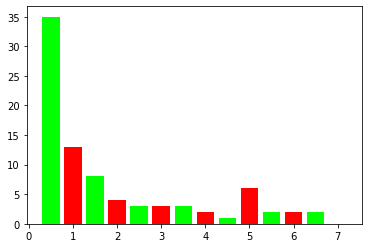

In [88]:
zx = 0.01
nums,bins = np.histogram(r2s,np.arange(0.5-x,8-x,0.5))
vals = np.arange(0.5,7.5,0.5)
import matplotlib.cm as cm
c = cm.brg((vals%1)+0.5)
plt.bar(vals,nums,width=0.4,color=c)